In [11]:
# Loading Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Loading the dataset
df = pd.read_csv("sales_data.csv")

In [3]:
# Printing first 5 rows
df.head()

,Product,Region,Sales,Profit,Discount,Category,Date
0,Tablet,North,4348.20,689.64,0,Office Supplies,2025-01-17
1,Tablet,West,4429.32,887.34,0,Accessories,2025-01-17
2,Mouse,North,2143.16,271.18,10,Electronics,2025-01-17
3,Smartphone,West,1098.88,825.07,25,Office Supplies,2025-01-17
4,Smartphone,South,3012.86,993.96,25,Electronics,2025-01-17


In [4]:
# Printing last 5 rows
df.tail()

,Product,Region,Sales,Profit,Discount,Category,Date
95,Tablet,West,2278.27,253.87,10,Office Supplies,2025-01-17
96,Mouse,West,3238.93,847.53,15,Electronics,2025-01-17
97,Keyboard,South,3375.31,780.70,15,Office Supplies,2025-01-17
98,Smartphone,South,417.64,908.56,5,Office Supplies,2025-01-17
99,Smartphone,North,817.08,37.88,15,Electronics,2025-01-17


In [5]:
# Giving information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   100 non-null    object 
 1   Region    100 non-null    object 
 2   Sales     100 non-null    float64
 3   Profit    100 non-null    float64
 4   Discount  100 non-null    int64  
 5   Category  100 non-null    object 
 6   Date      100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [7]:
# Shape of dataset
a = df.shape
print(f"Number of rows = {a[0]}")
print(f"Number of columns = {a[1]}")

Number of rows = 100
Number of columns = 7


In [8]:
# Missing Values
df.isna().sum()

Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

In [9]:
df = df.drop_duplicates()

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.fillna(df.median(numeric_only=True), inplace=True)

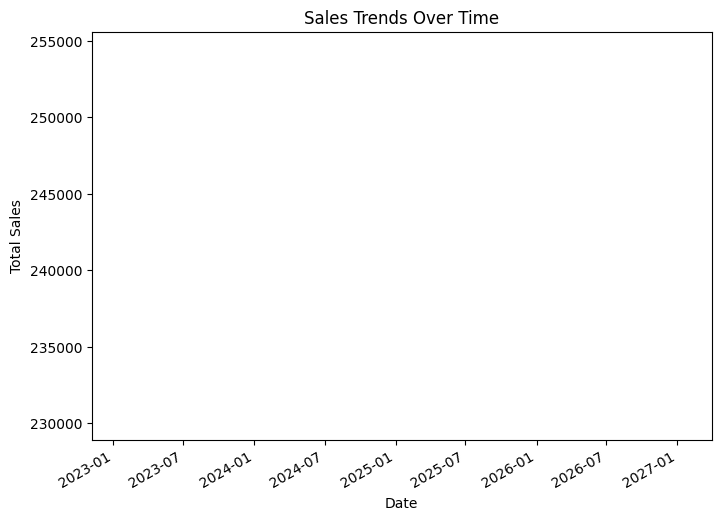

In [14]:
# Exploratory Data Analysis
# Sales trends over time
plt.figure(figsize=(8, 6))
df.groupby('Date')['Sales'].sum().plot(title='Sales Trends Over Time')
plt.ylabel('Total Sales')
plt.show()

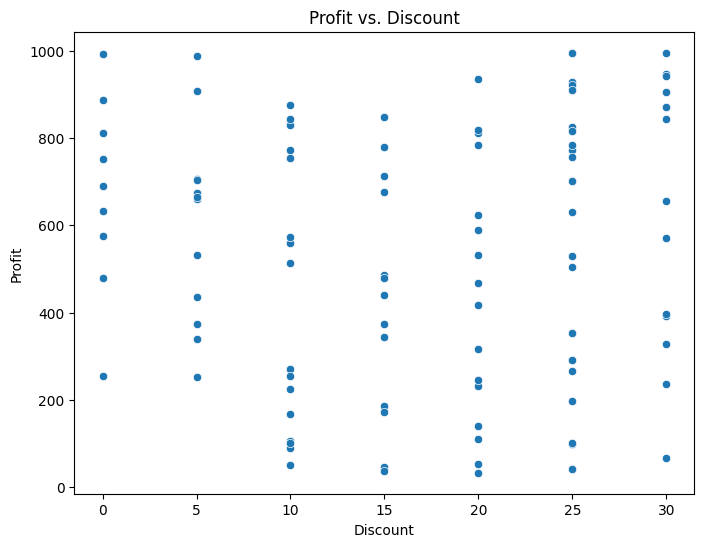

In [15]:
# Profit vs. Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Profit vs. Discount')
plt.show()

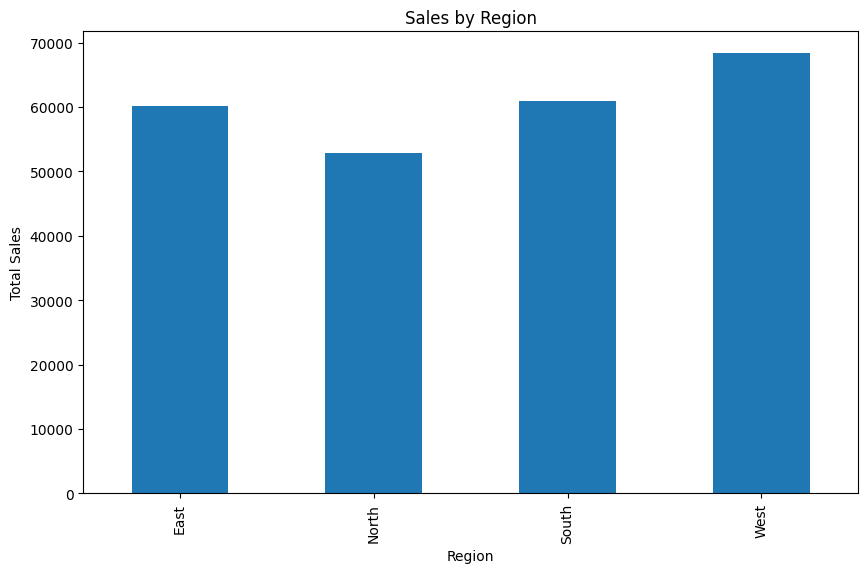

In [16]:
# Sales by Region
plt.figure(figsize=(10, 6))
df.groupby('Region')['Sales'].sum().plot(kind='bar', title='Sales by Region')
plt.ylabel('Total Sales')
plt.show()

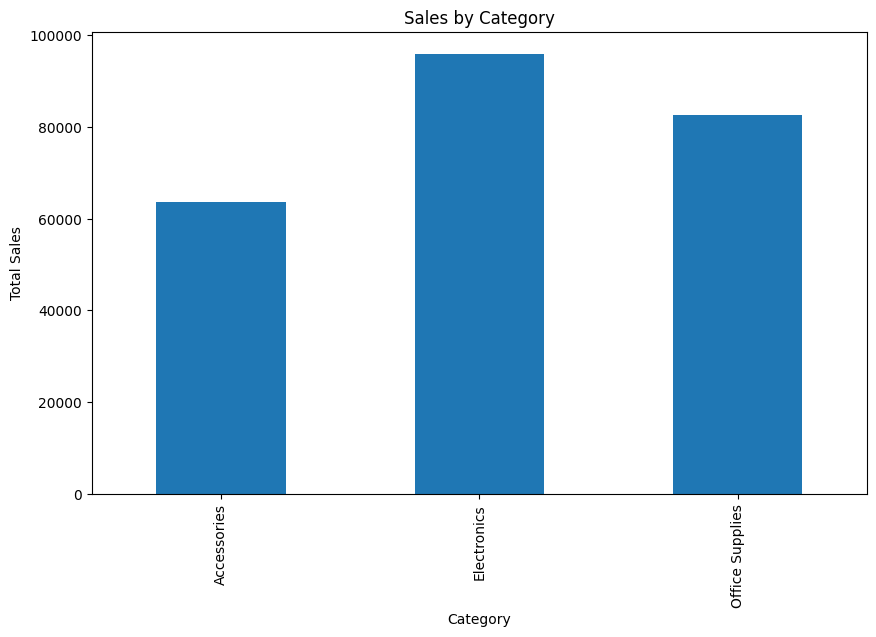

In [17]:
# Sales by Category
plt.figure(figsize=(10, 6))
df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Sales by Category')
plt.ylabel('Total Sales')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [19]:
# Predictive Modeling
# Features and target variable
X = df[['Profit', 'Discount']]
y = df['Sales']

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predictions
y_pred = model.predict(X_test)

In [27]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1298546.4084893754


In [24]:
# Coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  0.2283364  -23.45105008]
Model Intercept: 2660.8378864176916
